<a href="https://colab.research.google.com/github/marceloccs/deep_learning_pos_ai/blob/main/Trilha_6_Uso_de_PyThorch_como_tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Nome:** Marcelo Custodio Cruz Silva

##**Matricula:** 92123341

---

##**Curso:** Inteligencia Artificial

##**Turma:** B

*Link do arquivo no google colabs: https://colab.research.google.com/drive/1JTqOwJTCIigfYpiiUZgr4NP7flsBa3pc?usp=sharing*

*Link do arquivo no github: * 

#Trilha 6: Tarefa (Peso 3)

Nesta tarefa você deve implementar um modelo de classificação binária ou multiclasse com o PyTorch para o mesmo conjunto de dados empregado na atividade da Trilha 4. O resultado do seu modelo deve ser acima de 0.8 de acuracidade sobre o conjunto de teste (0.3 dos dados de treinamento).  

*Lembre-se: você compartilhou as informações da base empregada (nome, descrição, link) na atividade da Trilha 4!*

1. Você deve implementar o seu modelo com o PyTorch empregando o modelo fornecido de código, e o modo de programação deve seguir os padrões de subclasses do PyTorch apresentados na Trilha. Seu modelo deve apresentar, no mínimo, 0.8 de acuracidade (modelo final). 

2. Você deve incluir ainda, ao menos, uma técnica de regularização. Para isso, consulte a documentação do PyTorch e busque, ao menos, uma das técnicas estudadas na Trilha 5. Como você estará refinando um modelo, não deixe de apresentar os resultados do modelo inicial e final após aplicada a técnica de regularização, deixando clara a técnica ou técnicas empregadas. 

*Ao final, apresente as suas conclusões.*

##Preparos iniciais do modelo

###Imports para dependencias necessarias ao decorrer do modelo.

In [133]:
#Manipulação de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#PyTorch
import torch
import torch.nn as nn
from torch.autograd import Variable
#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
#Auxiliar para leitura e print de dados
from IPython.display import display

###Leitura do arquivo para predição de cogumelos.

*Modelo de classificação binária para identificação se o cogumelo, pelas suas características físicas, é comestível ou venenoso.*

**Link Kaggle:** https://archive.ics.uci.edu/ml/datasets/Mushroom

**Link Github:** https://raw.githubusercontent.com/marceloccs/pos-ai-files/main/Trilha%204%20Uso%20de%20tensores%20com%20TenserFlow/agaricus-lepiota.data

A seguir é utilizado um dataset contendo diversas especies de cogumelos, as características vão ser utilizadas para definir se o cogumelo é venenoso ou comestível. Para realizar esse predição é utilizado o modelo de classificação binária.

In [134]:
df = pd.read_csv('https://raw.githubusercontent.com/marceloccs/pos-ai-files/main/Trilha%204%20Uso%20de%20tensores%20com%20TenserFlow/agaricus-lepiota.data')
df = df.dropna()
display(df.head())

,classe,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


###Informações de atributos: 



     1. classes: comestíveis = e, venenosos = p
     2. forma de capa: sino = b, cônico = c, convexo = x, plano = f,knobbed = k, sunken = s
     3. superfície da capa: fibrosa = f, ranhuras = g, escamosa = y, lisa = s
     4. cor da tampa: marrom = n, amarelo-claro = b, canela = c, cinza = g, verde = r, rosa = p, roxo = u, vermelho = e, branco = w, amarelo = y
     5. hematomas ?: hematomas = t, não = f
     6. odor: amêndoa = a, anis = l, creosoto = c, peixe = y, fétido = f, mofo = m, nenhum = n, picante = p, picante = s 
     7. anexo de brânquia: anexado = a, descendente = d, livre = f, entalhado = n
     8. espaçamento entre guelras: próximo = c, lotado = w, distante = d
     9. tamanho da guelra: largo = b, estreito = n
     10. cor das guelras: preto = k, marrom = n, amarelo-claro = b, chocolate = h, cinza = g, verde = r, laranja = o, rosa = p, roxo = u, vermelho = e, branco = w, amarelo = y
     11. formato de haste: ampliação = e, afilamento = t
     12. raiz do caule: bulboso = b, clube = c, xícara = u, igual = e, rizomorfos = z, enraizado = r, ausente =?
     13. superfície da haste acima do anel: fibroso = f, escamoso = y, sedoso = k, liso = s
     14. superfície do caule abaixo do anel: fibroso = f, escamoso = y, sedoso = k, liso = s
     15. haste-cor-acima do anel: marrom = n, amarelo-claro = b, canela = c, cinza = g, laranja = o, rosa = p, vermelho = e, branco = w, amarelo = y
     16. cor-do-caule abaixo do anel: marrom = n, amarelo-claro = b, canela = c, cinza = g, laranja = o, rosa = p, vermelho = e, branco = w, amarelo = y
     17. tipo de véu: parcial = p, universal = u 
     18. cor do véu: marrom = n, laranja = o, branco = w, amarelo = y
     19. número do anel: nenhum = n, um = o, dois = t 19. tipo de anel: teia de aranha = c, evanescente = e, alargamento = f, grande = l, nenhum = n, pendente = p, revestimento = s, zona = z
     20. spore-print-color: black = k, brown = n, buff = b, chocolate = h, green = r, laranja = o, roxo = u, branco = w, amarelo = y
     21. população: abundante = a, agrupado = c, numeroso = n, espalhado = s, vários = v, solitário = y
     22. habitat: gramíneas = g, folhas = l, prados = m, caminhos = p, urbano = u, desperdício = w, madeiras = d

###Contagem de cogumelos por classe:

In [135]:
dfCount = df['classe'].value_counts()
display(dfCount)

e    4208
p    3916
Name: classe, dtype: int64

####Função Auxiliar para leitura descretização

*Como o modelo é para classificação binária, é necessario valores numéricos no modelo*
 
A função abaixo faz um Labbel enconder por valores na coluna, realizando uma discretização de valores.

In [136]:
def dataframeEncoding(dataframe):
    le = LabelEncoder()
    for i in range(len(dataframe.columns)):
        le.fit(dataframe.iloc[:,i])
        dataframe.iloc[:,i]  = le.transform(dataframe.iloc[:,i])
    return dataframe

In [137]:
df = dataframeEncoding(df)
display(df.head())

,classe,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


##Inicio do modelo, treinamento e resultado  

###Separação de modelos de teste e de treinamento

*Separando os grupos de teste e treino, com o tamanho de teste de 30% (ou 0.3) do modelo todo*

In [138]:
dfClassificacao = df.copy()
X = dfClassificacao.drop('classe', axis=1)
y = dfClassificacao[['classe']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
display(X_train.head())
display(y_train.head())

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
716,0,2,8,1,3,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,3,3
36,4,0,3,0,5,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,4,5
336,5,3,4,1,0,1,0,0,10,0,4,2,3,7,7,0,2,1,4,2,5,1
8084,0,0,3,0,5,1,1,0,7,0,0,1,1,7,7,0,2,2,4,7,3,1
960,5,0,4,0,5,1,1,0,5,1,3,0,0,7,7,0,2,1,0,2,0,1


,classe
716,0
36,0
336,0
8084,0
960,0


###Modelo de aprendizado binario

**Abaixo o modelo criado possui 4 camadas**
1.   Camada linear, com o input com o valor de entrada e a saida dom o dobro do que o valor de entrada.
2.   Camada de regressão linear.
3.   Camada para Dropout, para evitar o overfitting do modelo.
4.   Camada de saída com sigmoid para manter os valores para classificação binaria. *Com o valor de saida de 1 neurônio e para entrada o valor da camada anterior a camada de dropout.*

In [139]:
class Model(nn.Module):
    def __init__(self, input_dim,p):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, input_dim*2)
        self.layer2 = nn.Linear(input_dim*2, input_dim*4)
        self.layer3 = nn.Linear(input_dim*4, 1)
        self.dropout = nn.Dropout()
        self.p = p
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.dropout(self.dropout(x),self.p,train=True)
        x = torch.sigmoid(self.layer3(x))
        return x

In [140]:
from torch.utils.data import Dataset, DataLoader
class dataset(Dataset):
  def __init__(self,x,y):
    self.x = torch.tensor(x,dtype=torch.float32)
    self.y = torch.tensor(y,dtype=torch.float32)
    self.length = len(self.x)
 
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]
  def __len__(self):
    return self.length

trainset = dataset(X_train.to_numpy(),y_train.to_numpy())
trainloader = DataLoader(trainset,batch_size=64,shuffle=False)

**Função de perda é utilizado o "*binary_crossentropy*", como otimizado do modelo o "*adam*". Alem de declarar o modelo passando como parametro o tamanho da massa de treinamento e o parametro do dropout de probabilidade de elementos que serão zerados.**

In [141]:
model     = Model(X_train.shape[1],p=0.5)
optimizer = torch.optim.Adam(model.parameters())
loss_fn   = nn.BCELoss()
model

Model(
  (layer1): Linear(in_features=22, out_features=44, bias=True)
  (layer2): Linear(in_features=44, out_features=88, bias=True)
  (layer3): Linear(in_features=88, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

Criação do loop de aprendizado de 50 interações. Além da interação para aprendizado, algumas métricas são retiradas para visualização de gráfico do resultado do aprendizado.

In [142]:
import tqdm # somente para display da evolução do loop

EPOCHS = 50
loss_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    loss_batch = 0

    for x_batch, y_batch in trainloader:
        # compute the model output
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)
        # Zero gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_batch = loss_batch + loss.item()
    
    loss_list[epoch] = loss_batch / len(x_batch)
    

100%|██████████| 50/50 [00:07<00:00,  6.40it/s]


###Funções de auxilio para visualização do resultado do modelo.

In [143]:
def plot_history(loss_list):
  plt.plot(loss_list)
  plt.ylabel("Train Loss")
  plt.xlabel("Epoch")
  plt.show()

###Resultado do aprendizado:

Criação de DataSet para os conjuntos de teste.

In [144]:
testset = dataset(X_test.to_numpy(),y_test.to_numpy())
xx_test, yy_test = next(iter(testset))
yy_pred = model(xx_test).round()

Retirada de valor de acurancia do modelo, baseado no teste realizado

In [145]:
from sklearn.metrics import accuracy_score
print(accuracy_score(yy_test.detach().numpy(), yy_pred.detach().numpy()))

1.0


Plot do grafico da função de perda.

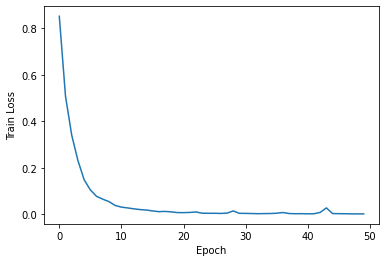

In [146]:
plot_history(loss_list)

##Conclusão

O modelo apresentado é um modelo simples para verificar se uma espécie de cogumelo é venenosa ou não baseado em suas características, o mesmo modelo foi feito no TensorFlow anteriormente. Agora podemos voltar a avaliação das diferenças entre os dois frameworks.

Quando olhamos para o PyTorch ele necessita que muitas características e tratamentos sejam explícitos durante o desenvolvimento, coisas que o Keras abstrai em seu core. Ao mesmo tempo, o PyTorch nos disponibiliza uma grande gama de customização, coisas que são omitidas pelo Keras. Para realização de tais customizações com o TensorFlow é necessário um trabalho muito extenso.

Pessoalmente sinto mais confortável com o Tensorflow, pois o mesmo facilita a codificação do modelo, além de possibilitar uma extração de relatórios mais dinâmica e simples, em conjunto com a interface do “TensorBoard”. Porém entendo a opção do PyThorch por muitos desenvolvedores e cientistas pois a forma explícita de declarar os “steps” deixa o desenvolvimento mais seguro e transmite mais clareza de suas ações.


